## import data

In [1]:
import pandas as pd

In [2]:
url = '/Users/sadiakhanrupa/Bootcamp Main Phase/Chapter_7 Supervised_ML/Data/housing_iteration_0_2_classification/housing_iteration_0_2_classification.csv'

In [3]:
data = pd.read_csv(url)

In [4]:
data.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0


## Set X and y

In [5]:
y= data.pop('Expensive')

In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Expensive, dtype: int64

In [7]:
X = data.copy()

## Split the data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.2, random_state=42)

In [9]:
X_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
254,8400,70.0,1314,3,0,0,1,250,0
1066,7837,59.0,799,3,1,0,2,0,0
638,8777,67.0,796,2,0,0,0,328,0
799,7200,60.0,731,3,2,0,1,0,0
380,5000,50.0,1026,3,1,0,1,0,0


In [10]:
X_test.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
892,8414,70.0,1059,3,0,0,1,192,0
1105,12256,98.0,1463,3,2,0,2,186,0
413,8960,56.0,1008,2,1,0,2,0,0
522,5000,50.0,1004,3,2,0,2,0,0
1036,12898,89.0,1620,2,1,0,3,228,0


## Impute Missing values

In [11]:
X_train.isnull().sum() #train data has 217 missing values in LotFrontage 

LotArea           0
LotFrontage     217
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

In [13]:
X_test.isnull().sum() #test data set has 42 missing value in LotFrontage column

LotArea          0
LotFrontage     42
TotalBsmtSF      0
BedroomAbvGr     0
Fireplaces       0
PoolArea         0
GarageCars       0
WoodDeckSF       0
ScreenPorch      0
dtype: int64

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer().set_output(transform='pandas')
imputer.fit(X_train)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.fit_transform(X_test)

In [21]:
#checking whether missing values exist or not
X_train_imputed.isnull().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64

In [22]:
X_test_imputed.isnull().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64

# seeing the effect of scaling

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler().set_output(transform='pandas')


In [71]:
scaler.fit(X_train_imputed)

StandardScaler()

In [72]:
X_train_imputed_scaled = scaler.fit_transform(X_train_imputed)

In [74]:
X_train_imputed_scaled.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
254,-0.212896,-0.015314,0.572612,0.136218,-0.958592,-0.070993,-1.056544,1.188402,-0.275838
1066,-0.265245,-0.505211,-0.596547,0.136218,0.592150,-0.070993,0.295092,-0.740157,-0.275838
638,-0.177841,-0.148922,-0.603357,-1.106774,-0.958592,-0.070993,-2.408179,1.790113,-0.275838
799,-0.324474,-0.460675,-0.750921,0.136218,2.142892,-0.070993,-1.056544,-0.740157,-0.275838
380,-0.529035,-0.906036,-0.081209,0.136218,0.592150,-0.070993,-1.056544,-0.740157,-0.275838


In [75]:
X_test_imputed_scaled = scaler.fit_transform(X_test_imputed)

In [76]:
X_test_imputed_scaled.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
892,-0.240216,0.053030,0.044012,0.269524,-0.922263,-0.058621,-0.917665,0.987116,-0.247557
1105,0.413601,1.443328,0.982892,0.269524,2.191042,-0.058621,0.376819,0.930475,-0.247557
413,-0.147300,-0.642119,-0.074510,-0.905119,0.634389,-0.058621,0.376819,-0.825404,-0.247557
522,-0.821198,-0.940040,-0.083806,0.269524,2.191042,-0.058621,0.376819,-0.825404,-0.247557
1036,0.522855,0.996446,1.347753,-0.905119,0.634389,-0.058621,1.671302,1.326964,-0.247557


## modelling : Decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier


In [24]:
my_tree = DecisionTreeClassifier(max_depth=4,
        min_samples_split=2,
        min_samples_leaf=10,)

In [25]:
my_tree.fit(X_train_imputed, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

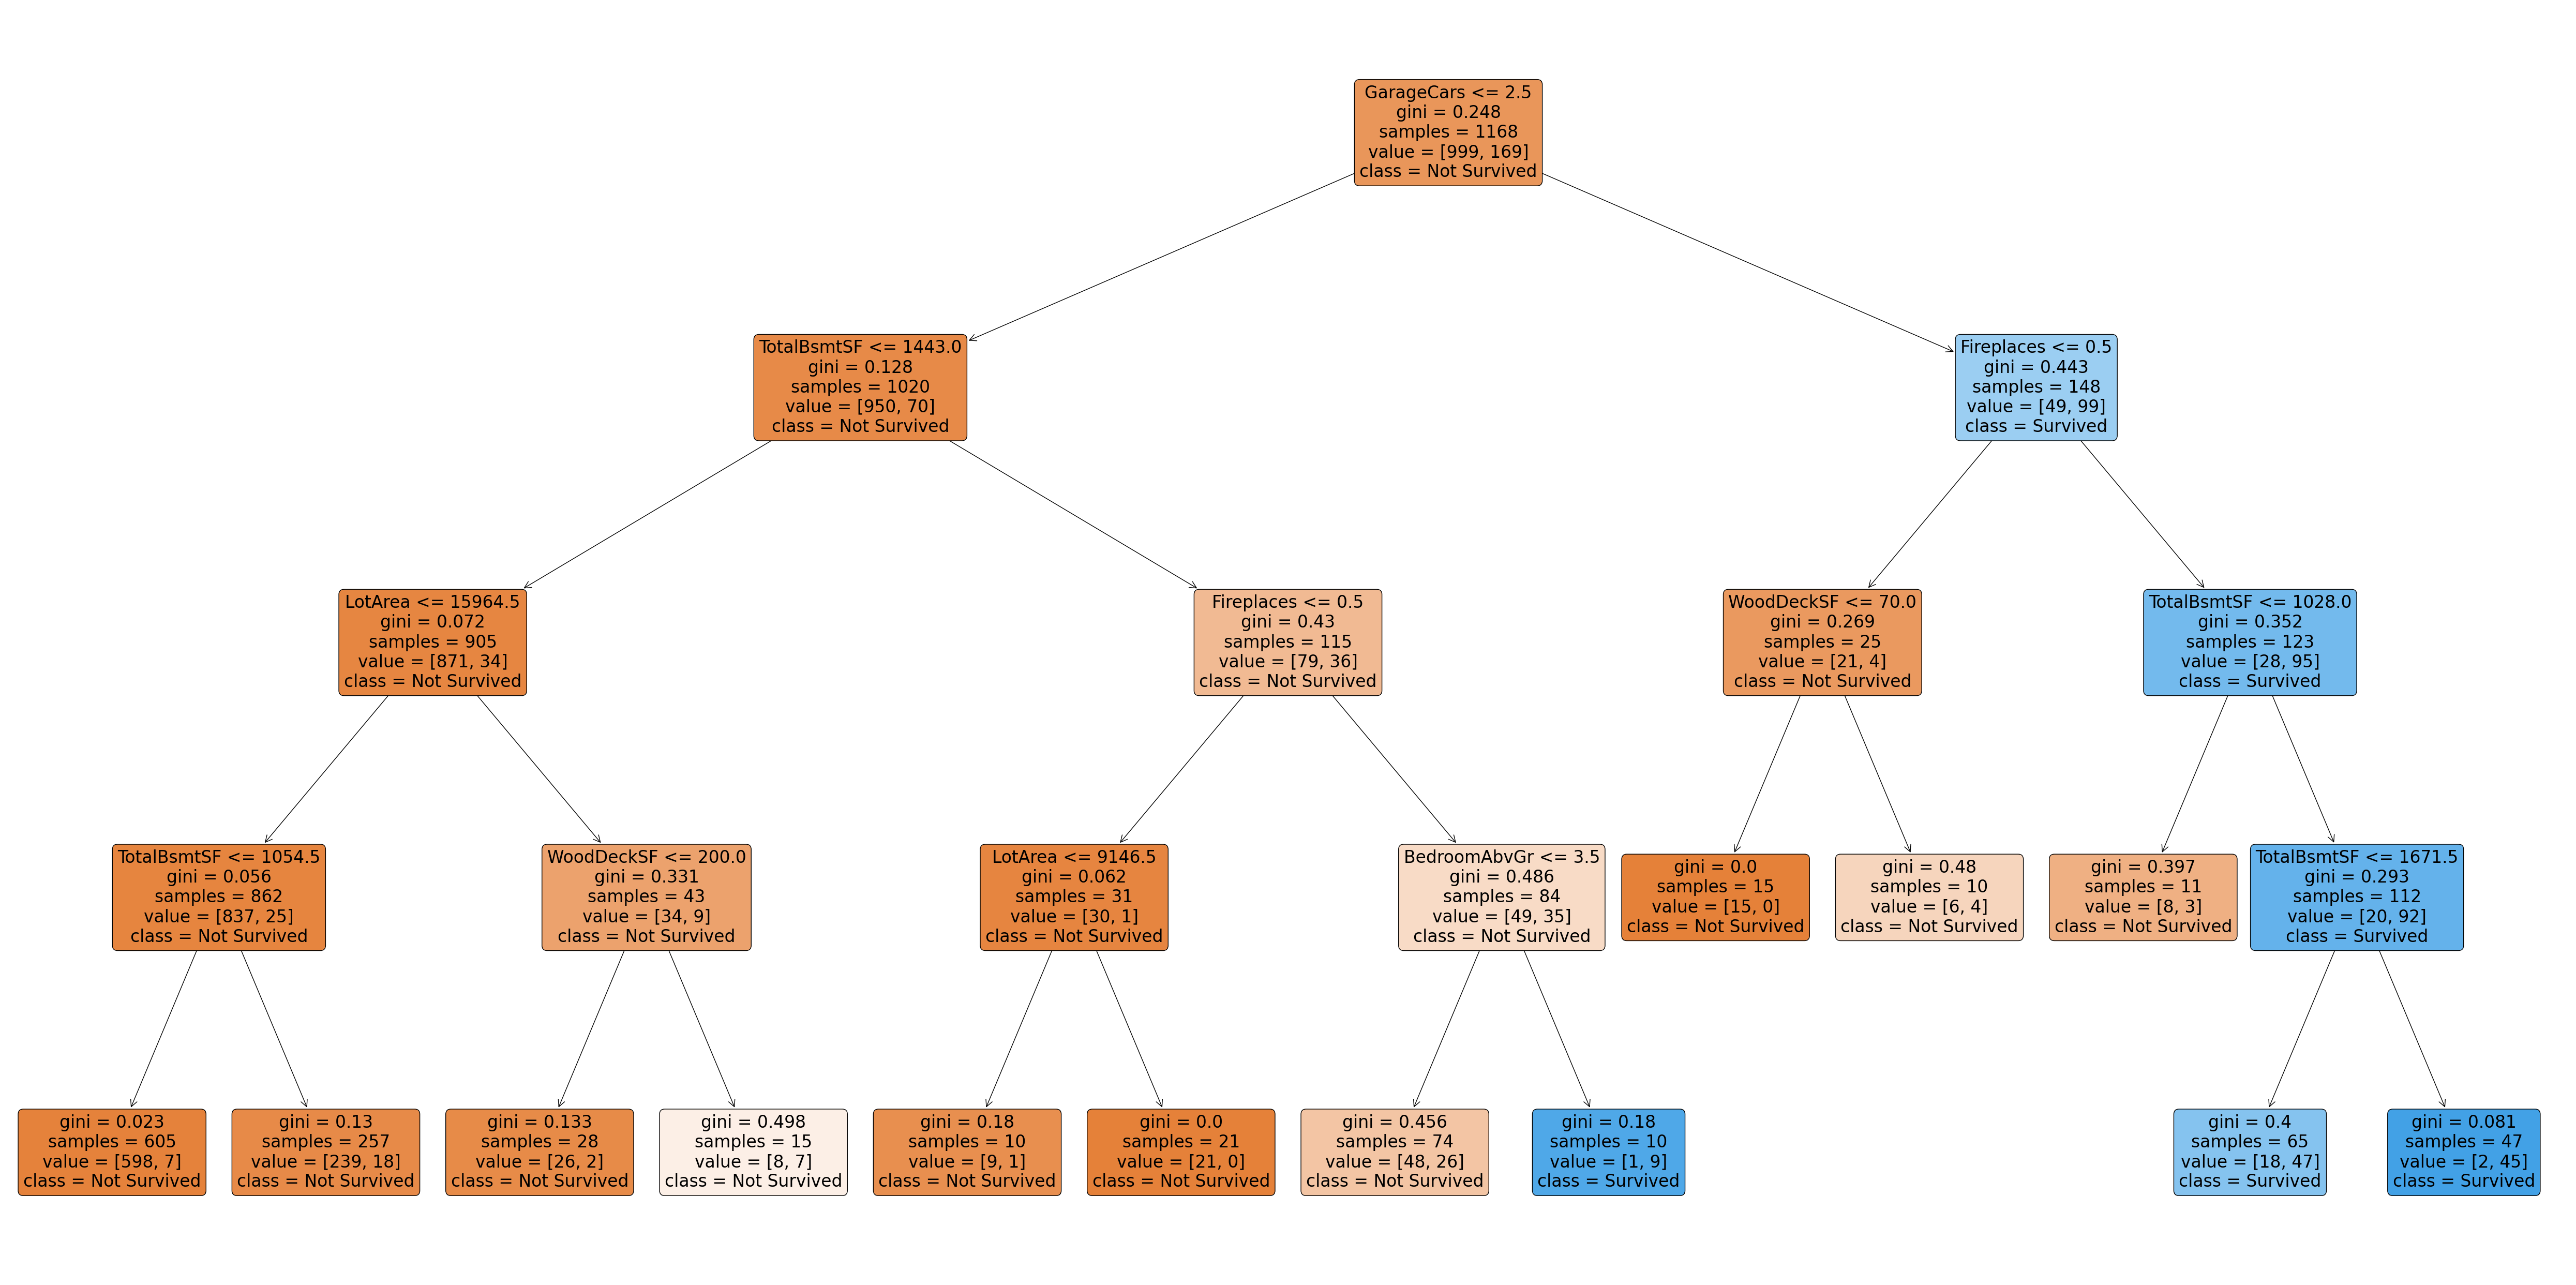

In [27]:
# plotting the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True,
     rounded=True,
     class_names=['Not Survived','Survived'],
     feature_names=X.columns.to_list()
     );

## Check accuracy on the train data set

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
y_train_predict = my_tree.predict(X_train_imputed)

In [30]:
training_accuracy = accuracy_score(y_train, y_train_predict)

In [31]:
training_accuracy

0.9238013698630136

## Check accuracy on the Test data set

In [32]:
y_test_predict = my_tree.predict(X_test_imputed)

In [33]:
test_accuacy = accuracy_score(y_test,y_test_predict)

In [34]:
test_accuacy

0.9315068493150684

# pipeline creation

In [35]:
from sklearn.pipeline import make_pipeline


In [43]:
imputer1 = SimpleImputer()
dtree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, random_state=42)

In [44]:
pipe = make_pipeline(imputer1, dtree).set_output(transform='pandas')

## fit the pipeline to the training data

In [46]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=8,
                                        random_state=42))])

## use pipeline to make predictions

In [47]:
y_test_pipe = pipe.predict(X_test)

In [48]:
accuracy_score(y_test, y_test_pipe)

0.928082191780822

## use GRIDSearchCV to find the best parameters of the model

>So far, we tuned the hyperparameters of the decision tree manually. This is not ideal, for two reasons:

- It's not efficient in terms of quickly finding the best combination of parameters.
- If we keep checking the performance on the test set over and over again, we might end up creating a model that fits that particular test set, but does not generalize as well with new data. Test sets are meant to reamain unseen until the very last moment of ML development —we have been cheating a bit!

Grid Search Cross Validation solves both issues:

* Read the lesson "Housing Prices: Iteration 2, Grid Search & Cross Validation" on the platform.

* Check the docs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [49]:
from sklearn.model_selection import GridSearchCV


In [50]:
# 1. initialize transformers & model without specifying the parameters
imputer = SimpleImputer()
dtree = DecisionTreeClassifier()

In [51]:
# 2. Create a pipeline
pipe = make_pipeline(imputer, dtree).set_output(transform='pandas')

In [58]:
param_grid = {
    'decisiontreeclassifier__max_depth': range(2, 12),
    'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
    'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
    'decisiontreeclassifier__criterion':['gini', 'entropy']
    }

In [59]:
search= GridSearchCV(pipe, 
                     param_grid,
                     cv=5,
                     scoring='accuracy',
                     verbose=2)

In [60]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=2, decisiontreeclassifier__min_samples_leaf=3, decisiontreeclassifier__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=2, decisiontreeclassifier__min_samples_leaf=3, decisiontreeclassifier__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=2, decisiontreeclassifier__min_samples_leaf=3, decisiontreeclassifier__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=2, decisiontreeclassifier__min_samples_leaf=3, decisiontreeclassifier__min_samples_split=3; total time=   0.0s
[CV] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=2, decisiontreeclassifier__min_samples_leaf=3, decisiontreeclassifier__min_sa

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 12),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
                         'decisiontreeclassifier__min_samples_split': range(3, 40, 5)},
             scoring='accuracy', verbose=2)

In [61]:
search.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__min_samples_leaf': 5,
 'decisiontreeclassifier__min_samples_split': 3}

In [62]:
search.best_score_

0.9066908770771432

In [63]:
search.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=5,
                                        min_samples_split=3))])

In [65]:
#training accuracy
y_train_prediction = search.predict(X_train)
train_acc = accuracy_score(y_train, y_train_prediction)
train_acc

0.9143835616438356

In [67]:
#testing accuracy
y_test_prediction = search.predict(X_test)
test_acc = accuracy_score(y_test, y_test_prediction)
test_acc

0.9246575342465754

## Use GridSearchCv to find the best parameters of the pipeline

>Add a scaler to the pipeline, and use GridSearchCV to tune the parameters of the scaler, as well as the parameters of the imputer and the decision tree.

This shows how Grid Search Cross Validation can be used to not only tune the parameters of the model but also the parameters of all the transformers in a pipeline, thus helping us find the best preprocessing strategy for our data.

In [68]:
from sklearn.preprocessing import StandardScaler


In [77]:
# initialize transformers and model
imputer2 = SimpleImputer()
scaler2 = StandardScaler()
dtree2 = DecisionTreeClassifier()

In [78]:
#create the pipeline
pipe2 = make_pipeline(imputer2, scaler2, dtree2).set_output(transform='pandas')

In [79]:
pipe2

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

We can see the steps in the pipeline (note that they have been given names: `simpleimputer` and `decisiontreeclassifier`. we will use these names when defining the parameter grid for the cross validation)

In [83]:
#create parameter grid
param_grid_2 = {
    'simpleimputer__strategy':['mean', 'median', 'most_frequent'],
    'standardscaler__with_mean':[True, False],
    'standardscaler__with_std':[True, False],
    'decisiontreeclassifier__max_depth':range (2,18),
    'decisiontreeclassifier__min_samples_leaf': range(3,15),
    'decisiontreeclassifier__criterion': ["gini", "entropy", "log_loss"]

    
}

In [84]:
# define cross validation
search2 = GridSearchCV(pipe2,
                       param_grid_2,
                       cv=10,
                       verbose=1)

In [85]:
#fit
search2.fit(X_train, y_train)

Fitting 10 folds for each of 6912 candidates, totalling 69120 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy',
                                                               'log_loss'],
                         'decisiontreeclassifier__max_depth': range(2, 18),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 15),
                         'simpleimputer__strategy': ['mean', 'median',
                                                     'most_frequent'],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             verbose=1)

In [87]:
search2.best_score_

0.9238432066018273

In [88]:
search2.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_samples_leaf': 8,
 'simpleimputer__strategy': 'mean',
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True}

## use RandomSearchCV

>Grid search can search a large number of hyperparameters, but it can become computationally expensive as the number of hyperparameters increases. Random search, on the other hand, can search a larger number of hyperparameters without becoming too computationally expensive, as it samples hyperparameters randomly

In [89]:
from sklearn.model_selection import RandomizedSearchCV


In [90]:
# initialize transformers and model
imputer3 = SimpleImputer()
scaler3 = StandardScaler()
dtree3 = DecisionTreeClassifier()

In [91]:
#create the pipeline
pipe3 = make_pipeline(imputer3, scaler3, dtree3).set_output(transform='pandas')

In [92]:
pipe3

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [93]:
#create parameter distributions
param_distributions = {
    'simpleimputer__strategy':['mean', 'median', 'most_frequent'],
    'standardscaler__with_mean':[True, False],
    'standardscaler__with_std':[True, False],
    'decisiontreeclassifier__max_depth':range (2,18),
    'decisiontreeclassifier__min_samples_leaf': range(3,15),
    'decisiontreeclassifier__criterion': ["gini", "entropy", "log_loss"]

    
}

In [94]:
search3 = RandomizedSearchCV(
    pipe3,
    param_distributions,
    cv=5,
    verbose=1
)

In [97]:
search3.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('decisiontreeclassifier',
                                              DecisionTreeClassifier())]),
                   param_distributions={'decisiontreeclassifier__criterion': ['gini',
                                                                              'entropy',
                                                                              'log_loss'],
                                        'decisiontreeclassifier__max_depth': range(2, 18),
                                        'decisiontreeclassifier__min_samples_leaf': range(3, 15),
                                        'simpleimputer__strategy': ['mean',
                                                                    'median',
                                                                    'most_frequent'],
                                        'standardscaler__with_mean': [True,
                                                                      False],
                                        'standardscaler__with_std': [True,
                                                                     False]},
                   verbose=1)

##### for same parameters , GridSearchCV took 5 mins, RandomizedSearchCV tool only 2 secs

In [98]:
search3.best_params_

{'standardscaler__with_std': True,
 'standardscaler__with_mean': True,
 'simpleimputer__strategy': 'most_frequent',
 'decisiontreeclassifier__min_samples_leaf': 4,
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__criterion': 'log_loss'}

In [99]:
search3.best_score_

0.9049704706357067